#### 1. 理论基石：条件概率、独立性与贝叶斯

**概率质量函数：** 将随机变量的每个值映射到其概率上

##### （1）二项分布

例子：抛硬币。将一枚硬币抛掷$n$次，每次抛掷的结果为正面向上的概率为$p$，每次抛掷彼此之间是相互独立的，随机变量$X$代表$n$次抛掷中，结果为正面向上的总次数

此时，随机变量$X$服从二项分布，核心参数即为$n$和$p$，随机变量的分布列：
$$
P_X(k) = P(X=k) = C^k_n p^k(1-p)^{n-k}
$$
如下代码绘制了不同$(n,p)$参数：（10，0.25），（10，0.5），（10，0.8）对应的概率质量函数图：

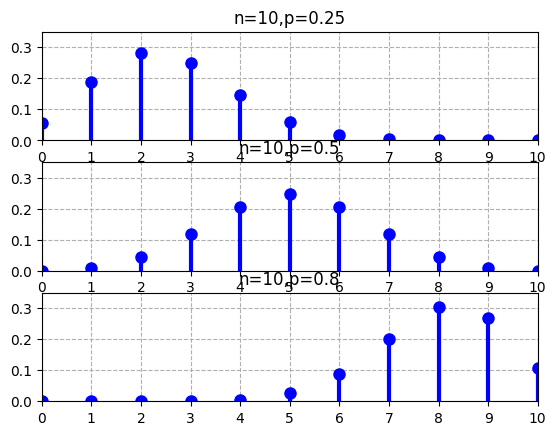

In [1]:
from scipy.stats import binom
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,1)
params = [(10,0.25),(10,0.5),(10,0.8)] # list对象----Python基本数据类型，用[]做为边界，用逗号作为分隔符，可容纳各种类型的数据，如[]，[1,2,'5','cd']等等，是可迭代的数据类型，可以被修改。
x = range(0,11) # range对象----range()是python的一个内置函数,用来创建一个整数序列,常用于for循环中。
for i in range(len(params)):
    binom_rv = binom(n=params[i][0],p=params[i][1])
    ax[i].set_title('n={},p={}'.format(params[i][0],params[i][1]))
    ax[i].plot(x,binom_rv.pmf(x),'bo',ms=8)
    ax[i].vlines(x,0,binom_rv.pmf(x),colors='b',lw=3) 
    ax[i].set_xlim(0,10) # 设置x坐标范围
    ax[i].set_ylim(0,0.35) # 设置y坐标范围
    ax[i].set_xticks(x) # x轴标尺
    ax[i].set_yticks([0,0.1,0.2,0.3]) # y轴标尺
    ax[i].grid(ls='--') # 网格

plt.show()

使用binom模块中的rvs方法，可以对二项随机变量进行采样：我们指定重复采样10万次（每次投掷10次，统计出现正面的次数），得到每种试验结果所对应的次数，然后通过归一化，计算出每一种取值所对应的频数，并将其作为概率的近似进行绘图观察

rvs0:[3 0 4 ... 1 3 4]
rvs1:[8 3 5 ... 6 2 6]
rvs2:[8 8 8 ... 7 8 9]


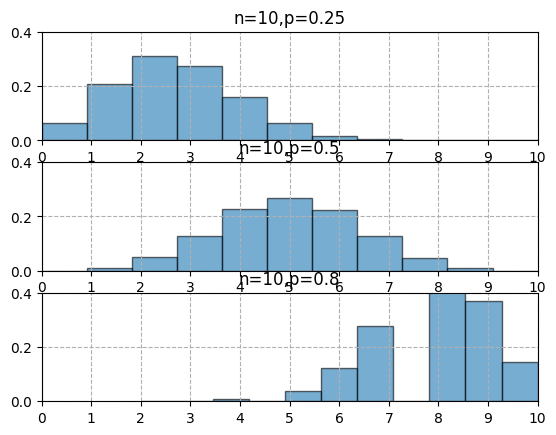

In [14]:
from scipy.stats import binom
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,1)
params = [(10,0.25),(10,0.5),(10,0.8)]
x = range(0,11)
for i in range(len(params)):
    binom_rv = binom(n=params[i][0],p=params[i][1])
    rvs = binom_rv.rvs(size=100000) # array对象
    ax[i].hist(rvs,bins=11,density=True,alpha=0.6,edgecolor='k') # alpha代表线条透明度；density=True将频数改为密度
    ax[i].set_title('n={},p={}'.format(params[i][0],params[i][1]))
    ax[i].set_xlim(0,10)
    ax[i].set_ylim(0,0.4)
    ax[i].set_xticks(x)
    ax[i].grid(ls='--')
    print('rvs{}:{}'.format(i,rvs));
plt.show()

二项分布的**期望**与**方差**：

服从二项分布$(n,p)$的随机变量$X$，其期望和方差公式为:(可利用期望与方差的线性性质来得到)
$$E[X]=\Sigma_k kP(X=k)=\Sigma_k k C^k_n p^k(1-p)^{n-k}=np$$
$$V[X] = E[(X-E[X])^2] = E[X^2] - E[X]^2=np(1-p)$$

使用实验对上述结果进行验证：

In [3]:
import numpy as np
from scipy.stats import binom
binom_rv = binom(n=10,p=0.25) # 新建一个二项分布
mean, var, skew, kurt = binom_rv.stats(moments='mvsk')
binom_rvs = binom_rv.rvs(size=100000)
E_sim = np.mean(binom_rvs)
S_sim = np.std(binom_rvs)
V_sim = S_sim * S_sim

print('mean={},var={}'.format(mean,var)) # 函数包中的方法计算
print('E_sim={},V_sim={}'.format(E_sim,V_sim)) # 通过样本数据计算
print('E=np={},V=np(1-p)={}'.format(10*0.25,10*0.25*0.75)) # 通过公式计算

mean=2.5,var=1.875
E_sim=2.50293,V_sim=1.8962114151000005
E=np=2.5,V=np(1-p)=1.875
